In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [9]:
df.shape

(3168, 21)

In [10]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [11]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [18]:
r1 = df['label'].value_counts()
r1

male      1584
female    1584
Name: label, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

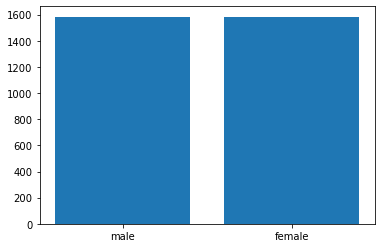

In [130]:
plt.bar(r1.index,r1)
plt.show

In [24]:
x = df.iloc[:,:-1]
y = df['label']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3168, 20)
(3168,)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


#### Import Models

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [71]:
def mscore(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))
    
def gen_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    print(classification_report(y_test,y_pred))
    print('Accuracy Score',accuracy_score(y_test,y_pred))

#### 1) Logistic Regression

In [33]:
m1 = LogisticRegression(max_iter=1000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [34]:
mscore(m1)

Training Score 0.9076558800315706
Testing Score 0.916403785488959


In [35]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

['male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'female'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'fema

In [72]:
gen_matrix(y_test,ypred_m1)

[[279  42]
 [ 11 302]]
              precision    recall  f1-score   support

      female       0.96      0.87      0.91       321
        male       0.88      0.96      0.92       313

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634

Accuracy Score 0.916403785488959


#### 2) Decision Tree Classifier

In [63]:
m2 = DecisionTreeClassifier(criterion= 'gini',min_samples_split=15,max_depth=10)
m2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=15)

In [64]:
mscore(m2)

Training Score 0.9917127071823204
Testing Score 0.9574132492113565


In [65]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

['male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'male' 'female' 'female' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'female' 'male' 'female' 'female' 'female'
 'male' 'm

In [73]:
gen_matrix(y_test,ypred_m2)

[[307  14]
 [ 13 300]]
              precision    recall  f1-score   support

      female       0.96      0.96      0.96       321
        male       0.96      0.96      0.96       313

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

Accuracy Score 0.9574132492113565


#### 3) KNN

In [93]:
m3 = KNeighborsClassifier(n_neighbors=2)
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [94]:
mscore(m3)

Training Score 0.8602999210734017
Testing Score 0.7097791798107256


In [95]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

['male' 'male' 'female' 'female' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'female'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female'
 'male' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'male' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'female'
 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'female'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'female' 'male'
 'female' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'female' 'female' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'mal

In [96]:
gen_matrix(y_test,ypred_m3)

[[273  48]
 [136 177]]
              precision    recall  f1-score   support

      female       0.67      0.85      0.75       321
        male       0.79      0.57      0.66       313

    accuracy                           0.71       634
   macro avg       0.73      0.71      0.70       634
weighted avg       0.73      0.71      0.70       634

Accuracy Score 0.7097791798107256


#### 4) Support Vector Classifier

In [ ]:
m4 = SVC(kernel='linear',C=1)
m4.fit(x_train,y_train)

In [98]:
mscore(m4)

Training Score 0.9183109707971586
Testing Score 0.9321766561514195


In [99]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

['male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'male'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'mal

In [100]:
gen_matrix(y_test,ypred_m4)

[[284  37]
 [  6 307]]
              precision    recall  f1-score   support

      female       0.98      0.88      0.93       321
        male       0.89      0.98      0.93       313

    accuracy                           0.93       634
   macro avg       0.94      0.93      0.93       634
weighted avg       0.94      0.93      0.93       634

Accuracy Score 0.9321766561514195


#### 5) Random Forest Classifier

In [118]:
m5 = RandomForestClassifier(criterion = 'gini',min_samples_split = 15,max_depth = 10,random_state = 5)
m5.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=15, random_state=5)

In [119]:
mscore(m5)

Training Score 0.9936858721389108
Testing Score 0.9826498422712934


In [113]:
ypred_m5 = m5.predict(x_test)
print(ypred_m5)

['male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'male' 'female' 'female' 'female' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'male'
 'fe

In [114]:
gen_matrix(y_test,ypred_m5)

[[317   4]
 [  7 306]]
              precision    recall  f1-score   support

      female       0.98      0.99      0.98       321
        male       0.99      0.98      0.98       313

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Accuracy Score 0.9826498422712934
